In [1]:
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from sklearn.feature_extraction import DictVectorizer 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import copy

In [2]:
train = pd.read_csv("/Users/ajaypatel21/Downloads/HousingData/train.csv")
test = pd.read_csv("/Users/ajaypatel21/Downloads/HousingData/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Data Cleaning**

In [5]:
for data in [train, test]:
    for col in ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", 
                "Fence", "MiscFeature"]:
        data[col] = data[col].fillna("None")

In [7]:
for data in [train, test]:
    for col in data.columns:
    #     print(train[col].dtype)
        if (data[col].dtype == "int64") or (data[col].dtype == "float64"):
            data[col] = data[col].fillna(data[col].mean())
        else:
            data[col] = data[col].fillna(data[col].value_counts().idxmax())

In [9]:
X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]
Xtest = test

for col in X.columns:
    if (X[col].dtype == test[col].dtype) == False:
        print(col, X[col].dtype, test[col].dtype)
        test[col] = test[col].astype(int)

**Looking for outliers**

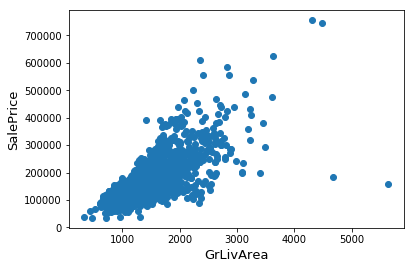

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Removing Outliers**

In [11]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

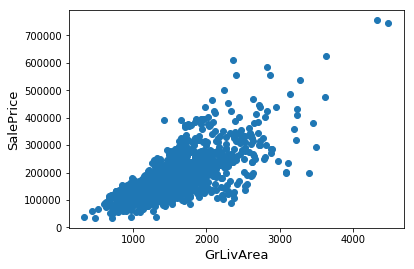

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

**Fitting RF, Lasso, and Elastic Net**

In [13]:
X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]

In [ ]:
# from sklearn import linear_model
# from sklearn.linear_model import ElasticNet
# from sklearn.preprocessing import RobustScaler

# vec = DictVectorizer(sparse=False)
# scaler = RobustScaler()

# for model in [RandomForestRegressor(n_estimators=500), linear_model.Lasso(alpha=0.01, random_state=1, max_iter=1000), 
#               ElasticNet(alpha=0.01, random_state=1, max_iter=1000, l1_ratio=.7)]:
#     pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
#     X_dict = X.to_dict(orient="records")
#     print(model)
#     print(np.mean(-cross_val_score(pipeline, X_dict, y, cv=5, scoring="neg_mean_squared_error")))
#     print("")  

**Plotting SalePrice**

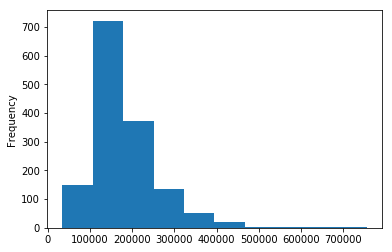

In [14]:
train["SalePrice"].plot.hist();

**Reshaping SalePrice**

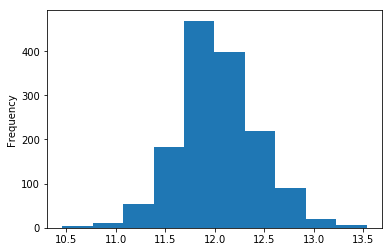

In [15]:
np.log1p(train["SalePrice"]).plot.hist()

In [16]:
X = train.drop("SalePrice", axis=1)
y = train["SalePrice"]
y = np.log1p(y)

In [19]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler

vec = DictVectorizer(sparse=False)
scaler = RobustScaler()

rf = RandomForestRegressor(n_estimators=500)
lasso = linear_model.Lasso(alpha=0.01, random_state=1, max_iter=1000)
elastic_net = ElasticNet(alpha=0.01, random_state=1, max_iter=1000, l1_ratio=.7)

for model in [rf, lasso, elastic_net]:
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    X_dict = X.to_dict(orient="records")
    print(model)
    print(np.mean(-cross_val_score(pipeline, X_dict, y, cv=5, scoring="neg_mean_squared_error")))
    print("")

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.019024041470010192

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)
0.017500054824624117

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False)
0.01659931046662357



**Ensemble 3 models**

In [20]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

Xtrain = X
ytrain = y
Xtest = test

# for col in X.columns:
#     if (X[col].dtype == test[col].dtype) == False:
#         print(col, X[col].dtype, test[col].dtype)
#         test[col] = test[col].astype(int)

# Xtrain = Xtrain.astype(int)

Xtrain = Xtrain.to_dict(orient="records")
Xtest = Xtest.to_dict(orient="records")

vec = DictVectorizer(sparse=False) 
vec.fit(Xtrain)
Xtrain = vec.transform(Xtrain)
Xtest = vec.transform(Xtest)

scaler = RobustScaler()
scaler.fit(Xtrain)
Xtrain_sc = scaler.transform(Xtrain)
Xtest_sc = scaler.transform(Xtest)

# Xtrain = Xtrain.astype(int)

model = VotingClassifier(estimators=[('rf', rf), ('lasso', lasso), ('elastic_net', elastic_net)])
model.fit(Xtrain, ytrain)
# model.score(x_test,y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


VotingClassifier(estimators=[('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n...e=False, precompute=False,
      random_state=1, selection='cyclic', tol=0.0001, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [21]:
model.predict(Xtest)

TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

In [ ]:
# from sklearn.ensemble import VotingClassifier
# from sklearn import model_selection

# Xtrain = X
# ytrain = y

# Xtrain = Xtrain.to_dict(orient="records")
# # Xtest = Xtest.to_dict(orient="records")

# vec = DictVectorizer(sparse=False) 
# vec.fit(Xtrain)
# Xtrain = vec.transform(Xtrain)
# # Xtest = vec.transform(Xtest)

# scaler = RobustScaler()
# scaler.fit(Xtrain)
# Xtrain_sc = scaler.transform(Xtrain)
# # Xtest_sc = scaler.transform(Xtest)

# Xtrain = Xtrain.astype(int)

# seed = 21
# kfold = model_selection.KFold(n_splits=10, random_state=seed)

# # create the sub models
# estimators = []
# estimators.append(('rf', rf))
# estimators.append(('lasso', lasso))
# estimators.append(('elastic_net', elastic_net))

# # create the ensemble model
# ensemble = VotingClassifier(estimators)
# results = model_selection.cross_val_score(ensemble, Xtrain_sc, ytrain, cv=kfold)
# print(results.mean())